<a href="https://colab.research.google.com/github/paulynamagana/Covid19_Pneumonia_Classification/blob/main/classification_covid_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np


# Do Matplotlib extension below
# use this savefig call at the end of the graph instead of using plt.show()
# plt.savefig('static/images/my_plots.png')



In [18]:
#create data generator
print("\nLoading training data...")

training_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05)

CLASS_MODE = "categorical"
COLOR_MODE= "grayscale"
TARGET_SIZE= (256,256)
BATCH_SIZE= 32

training_iterator= training_data_generator.flow_from_directory(
    "Covid19-dataset/train",
    class_mode = CLASS_MODE,
    color_mode= COLOR_MODE,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE)

sample_batch_input, sample_batch_labels = training_iterator.next()
print(sample_batch_input.shape, sample_batch_labels.shape)


Loading training data...
Found 251 images belonging to 3 classes.
(32, 256, 256, 1) (32, 3)


In [19]:
#test data iterator
print("\nLoading validation data...")

test_data_generator = ImageDataGenerator(
        rescale=1.0/255)

test_iterator = test_data_generator.flow_from_directory(
        'Covid19-dataset/test',
        class_mode=CLASS_MODE,
        color_mode=COLOR_MODE,
        batch_size=BATCH_SIZE)
print("\nBuilding model...")


Loading validation data...
Found 66 images belonging to 3 classes.

Building model...


In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = (256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5,5)))
model.add(tf.keras.layers.Conv2D(4, 3, strides=2, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation="softmax"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 86, 86, 2)         52        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 2)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 4)           76        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 4)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                

In [21]:
print("\nCompiling model...")
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.CategoricalCrossentropy() ,
  metrics=[tf.keras.metrics.CategoricalAccuracy(),
  tf.keras.metrics.AUC()]
)


Compiling model...


In [22]:
print("\nTraining model...")
history = model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/BATCH_SIZE,
        epochs=15,
        validation_data=test_iterator ,
        validation_steps=test_iterator.samples/BATCH_SIZE)


Training model...
Epoch 1/15
7/7 [==============================] - 4s 469ms/step - loss: 1.1177 - categorical_accuracy: 0.2629 - auc_2: 0.4662 - val_loss: 1.1024 - val_categorical_accuracy: 0.3182 - val_auc_2: 0.4973
Epoch 2/15
7/7 [==============================] - 4s 534ms/step - loss: 1.1053 - categorical_accuracy: 0.2470 - auc_2: 0.4645 - val_loss: 1.0960 - val_categorical_accuracy: 0.3939 - val_auc_2: 0.5248
Epoch 3/15
7/7 [==============================] - 3s 418ms/step - loss: 1.0982 - categorical_accuracy: 0.4024 - auc_2: 0.5215 - val_loss: 1.0931 - val_categorical_accuracy: 0.4091 - val_auc_2: 0.5473
Epoch 4/15
7/7 [==============================] - 4s 468ms/step - loss: 1.0943 - categorical_accuracy: 0.4303 - auc_2: 0.5465 - val_loss: 1.0920 - val_categorical_accuracy: 0.3788 - val_auc_2: 0.5527
Epoch 5/15
7/7 [==============================] - 4s 488ms/step - loss: 1.0918 - categorical_accuracy: 0.4462 - auc_2: 0.5511 - val_loss: 1.0913 - val_categorical_accuracy: 0.3939 -

In [23]:
test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predictions = model.predict(test_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

              precision    recall  f1-score   support

       Covid       0.41      0.96      0.57        26
      Normal       0.40      0.10      0.16        20
   Pneumonia       0.00      0.00      0.00        20

    accuracy                           0.41        66
   macro avg       0.27      0.35      0.24        66
weighted avg       0.28      0.41      0.27        66

[[25  1  0]
 [18  2  0]
 [18  2  0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

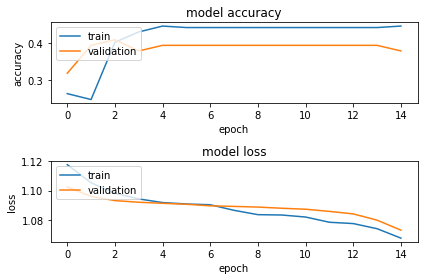

In [24]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping
fig.tight_layout()
fig.savefig("acc_loss.png")